# Importing libraries and data

In [4]:
!pip install eli5
!pip install keras
!pip install tensorflow
!pip install imblearn

     |████████████████████████████████| 165.1MB 113kB/s  eta 0:00:01   |██▋                             | 13.7MB 1.8MB/s eta 0:01:27     |█████████▊                      | 50.2MB 34.6MB/s eta 0:00:04     |████████████████████▎           | 104.5MB 4.4MB/s eta 0:00:14     |███████████████████████▍        | 120.8MB 4.4MB/s eta 0:00:11
     |████████████████████████████████| 3.0MB 32.0MB/s eta 0:00:01
     |████████████████████████████████| 61kB 14.6MB/s eta 0:00:01
     |████████████████████████████████| 51kB 13.4MB/s eta 0:00:01
     |████████████████████████████████| 6.8MB 23.8MB/s eta 0:00:01     |████████████████████████████▎   | 6.0MB 23.8MB/s eta 0:00:01
     |████████████████████████████████| 3.0MB 11.2MB/s eta 0:00:01
     |████████████████████████████████| 460kB 15.6MB/s eta 0:00:01
     |████████████████████████████████| 133kB 24.3MB/s eta 0:00:01
     |████████████████████████████████| 28.4MB 11.0MB/s eta 0:00:01     |███████████████████████▌        | 20.9MB 18.4MB/s eta 0:00:0

     |████████████████████████████████| 163kB 8.2MB/s eta 0:00:01
     |████████████████████████████████| 51kB 12.2MB/s eta 0:00:01
     |████████████████████████████████| 81kB 9.2MB/s  eta 0:00:01
     |████████████████████████████████| 153kB 39.9MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4832 sha256=d9d07e6c8e86b76980b5e39429654cf6a3f046a5fed6a8af9388866bfcf09a10
  Stored in directory: /Users/maneeratwongjaroenporn/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: h5py 2.9.0
    Uninstalling h5py-2.9.0:
      Successfully uninstalled h5py-2.9.0
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1


In [10]:
import pandas as pd
import datetime as dt
import numpy as np
from numpy import where

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import pyplot

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_to_object_array' from 'sklearn.utils' (/Users/maneeratwongjaroenporn/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py)

In [ ]:
data = pd.read_csv('loan.csv')

In [304]:
data.describe()

,Unnamed: 0,id,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int
count,10000.000000,1.000000e+04,10000.000000,10000.00000,9524.000000,9524.000000,9524.000000,9524.000000,4100.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000
mean,100010.000000,5.143648e+06,14054.807500,14052.73000,442.626605,71655.752245,17.146927,0.238765,34.988537,11.043784,15982.998215,24.517640,10253.674229,5225.240946,3808.501311,1412.893987
std,57737.913598,2.827944e+06,8108.658728,8107.69323,244.522116,45362.834495,7.591601,0.691455,21.474509,4.561028,15177.648105,10.887693,7963.300050,5499.478657,4801.501191,1489.227516
min,20.000000,5.712030e+05,1000.000000,1000.00000,30.440000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,34.140000,22.500000,11.640000
25%,50015.000000,2.300882e+06,8000.000000,8000.00000,266.575000,45000.000000,11.520000,0.000000,17.000000,8.000000,7151.000000,17.000000,4273.387500,1676.312500,1027.525000,468.112500
50%,100010.000000,5.605038e+06,12000.000000,12000.00000,398.510000,61000.000000,16.840000,0.000000,32.000000,10.000000,12495.000000,23.000000,8745.425000,3500.040000,2237.870000,947.000000
75%,150005.000000,7.435741e+06,19400.000000,19400.00000,576.737500,86000.000000,22.590000,0.000000,49.000000,14.000000,20596.000000,31.000000,15055.437500,6736.965000,4544.470000,1777.870000
max,200000.000000,1.012507e+07,35000.000000,35000.00000,1388.450000,1000000.000000,34.980000,11.000000,122.000000,39.000000,376679.000000,68.000000,34413.520000,44231.080000,35000.010000,13514.550000


# Formatting, Cleaning and Dealing with NaN

In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9119 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          9119 non-null   int64         
 1   loan_amnt                   9119 non-null   int64         
 2   term                        9119 non-null   int64         
 3   int_rate                    9119 non-null   float64       
 4   installment                 9119 non-null   float64       
 5   emp_length                  9119 non-null   object        
 6   annual_inc                  9119 non-null   float64       
 7   loan_status                 9119 non-null   object        
 8   addr_state                  9119 non-null   object        
 9   dti                         9119 non-null   float64       
 10  delinq_2yrs                 9119 non-null   float64       
 11  earliest_cr_line            9119 non-null   datetime64[n

There are 10,000 rows and 23 columns in total from the csv file. There are a lot of columns containing NaN value which will be a problem when plotting the graph in the data exploration part or conducting the model for classification.


In [468]:
#'Unnamed: 0' column is dropped because there is no meaning
#'funded_amnt'column is dropped because the data is redundant to 'loan_amnt' 
data = data.drop(['Unnamed: 0','funded_amnt'],axis=1)

def loan_type(row):
    if row['loan_status'] in ['Current','Fully Paid']:
        val=0
    else:
        val=1
    return val

# 'loan_type' column is created to represent bad loan and good loan depending on the value in 'loan_status'
data['loan_type'] = data.apply(loan_type,axis=1)

KeyError: ignored

In [ ]:
#'duration_cr_line' column is created to represent the duration from 'earliest_cr_line' column and present time
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], infer_datetime_format=True)
data['duration_cr_line'] = (pd.to_datetime("now")-data['earliest_cr_line']).dt.days

In [469]:
#'mths_since_last_delinq'column contains the most NaN value because there are a lot of borrowers with no delinquency history. The lower number represents the recent history, therefore, the higher number, the better credit history of the borrower. Therefore, I replace NaN value for the borrowers with no delinquency history to be 1,000.
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].fillna(1000.0)

#Remove NaN from annual_inc and emp_length
data = data.dropna(subset=['annual_inc','emp_length'])

#Change the data type of int_rate and term
data['int_rate'] = data.apply(lambda x: float(x['int_rate'][0:-1])/100,axis=1)
data['term'] = data.apply(lambda x: int(x['term'].split()[0]),axis=1)

TypeError: ignored

In [ ]:
data.info()

# Encoding Categorial Column

In [310]:
home_encoder = pd.get_dummies(data["home_ownership"],prefix='home_type')
purpose_encoder =  pd.get_dummies(data["purpose"],prefix='purpose')

In [311]:
OH_columns = ['home_ownership','purpose']
data = data.drop(OH_columns,axis=1)
data = pd.concat([data,home_encoder,purpose_encoder],axis=1)

In [312]:
emp_length_sort = ['< 1 year','1 year', '2 years', '3 years','4 years',  '5 years', '6 years', '7 years','8 years', '9 years','10+ years']
def emp_sort(row):  
  return emp_length_sort.index(row['emp_length'])
    
data['le_emp_length'] = data.apply(emp_sort,axis=1)

In [313]:
clean_data = data.drop(['emp_length','loan_status','addr_state','id'],axis=1)

In [314]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9119 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   9119 non-null   int64         
 1   term                        9119 non-null   int64         
 2   int_rate                    9119 non-null   float64       
 3   installment                 9119 non-null   float64       
 4   annual_inc                  9119 non-null   float64       
 5   dti                         9119 non-null   float64       
 6   delinq_2yrs                 9119 non-null   float64       
 7   earliest_cr_line            9119 non-null   datetime64[ns]
 8   mths_since_last_delinq      9119 non-null   float64       
 9   open_acc                    9119 non-null   float64       
 10  revol_bal                   9119 non-null   float64       
 11  total_acc                   9119 non-null   float64     

# Data exploration

In [315]:
data['loan_status'].value_counts()

Current               7769
Fully Paid             921
Charged Off            209
Late (31-120 days)     140
In Grace Period         46
Late (16-30 days)       19
Default                 15
Name: loan_status, dtype: int64

Text(0, 0.5, 'Number of borrowers')

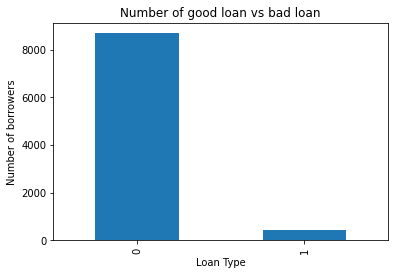

In [316]:

type_count = clean_data['loan_type'].value_counts()
type_count.plot(kind="bar")

plt.title("Number of good loan vs bad loan")
plt.xlabel("Loan Type")
plt.ylabel("Number of borrowers")

We can see that the positive case(bad loan) accounts only 5% of all data. This is common for the data like fraud detections that the dataset is highly imbalanced.

## feature inspection and outlier check

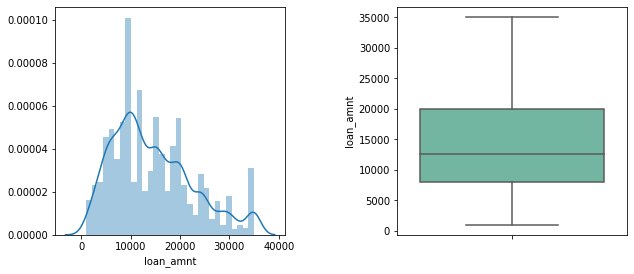

In [317]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(clean_data["loan_amnt"], ax=axes[0]);
sns.boxplot(clean_data["loan_amnt"], orient="v", palette="Set2", ax=axes[1])

fig.tight_layout(pad=5.0)

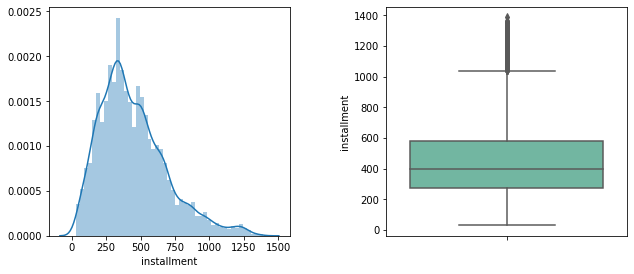

In [318]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(clean_data["installment"], ax=axes[0]);
sns.boxplot(clean_data["installment"], orient="v", palette="Set2", ax=axes[1])

fig.tight_layout(pad=5.0)

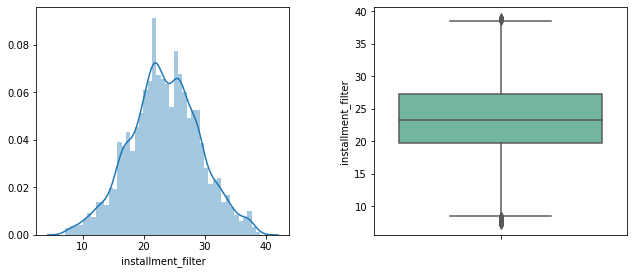

In [319]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(clean_data["installment"].values.reshape(-1, 1))

clean_data['installment_filter'] = pt.transform(clean_data["installment"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(clean_data['installment_filter'], ax=axes[0]);
sns.boxplot(clean_data['installment_filter'], orient="v", palette="Set2", ax=axes[1])
fig.tight_layout(pad=5.0)

In [320]:
Q1 = clean_data['installment_filter'].quantile(0.25)
Q3 = clean_data['installment_filter'].quantile(0.75)
IQR = Q3 - Q1 

filter = (clean_data['installment_filter'] >= Q1 - 1.5 * IQR) & (clean_data['installment_filter'] <= Q3 + 1.5 *IQR)
data_2=data.loc[filter] 

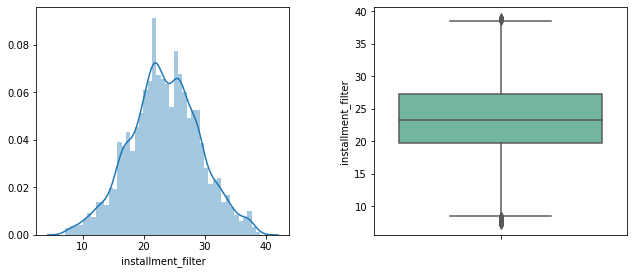

In [321]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(clean_data['installment_filter'], ax=axes[0]);
sns.boxplot(clean_data['installment_filter'], orient="v", palette="Set2", ax=axes[1])
fig.tight_layout(pad=5.0)

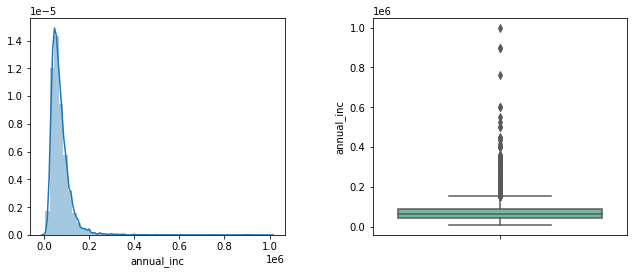

In [322]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(clean_data["annual_inc"], ax=axes[0]);
sns.boxplot(clean_data["annual_inc"], orient="v", palette="Set2", ax=axes[1])

fig.tight_layout(pad=5.0)

In [323]:
clean_data["annual_inc_int"] = pd.cut(data["annual_inc"],
                                bins=7,
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

In [324]:
clean_data["annual_inc_int"].value_counts()

0    8696
1     373
2      38
3       6
6       3
4       2
5       1
Name: annual_inc_int, dtype: int64

In [325]:
clean_data = clean_data[clean_data.annual_inc_int <2]

A lot of customer has annual income from $0-$200,000 so the right side of the distribution is almost flat. The powertransform cannot use with this kind of data. After grouping the data into 7 bins , I remove the data from 2-6 which is less than 5% of all data

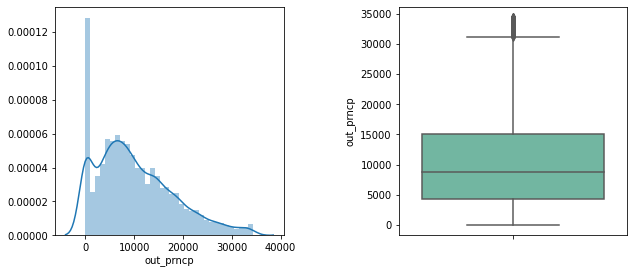

In [326]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(clean_data["out_prncp"], ax=axes[0]);
sns.boxplot(clean_data["out_prncp"], orient="v", palette="Set2", ax=axes[1])

fig.tight_layout(pad=5.0)

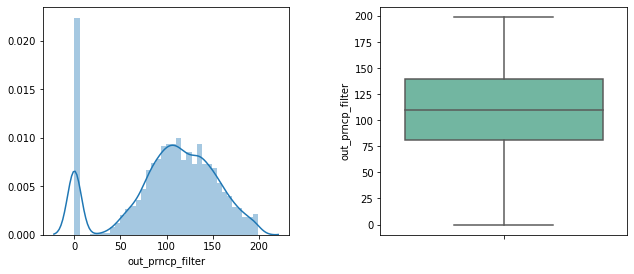

In [327]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(clean_data["out_prncp"].values.reshape(-1, 1))

clean_data['out_prncp_filter'] = pt.transform(clean_data["out_prncp"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(clean_data['out_prncp_filter'], ax=axes[0]);
sns.boxplot(clean_data['out_prncp_filter'], orient="v", palette="Set2", ax=axes[1])
fig.tight_layout(pad=5.0)

## Finding the correlation

In [328]:
clean_df = clean_data.drop(["out_prncp","annual_inc_int","installment"],axis=1)

In [329]:
corr_matrix = clean_df.corr()
corr_matrix

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,open_acc,revol_bal,total_acc,total_pymnt,total_rec_prncp,total_rec_int,loan_type,duration_cr_line,home_type_MORTGAGE,home_type_NONE,home_type_OTHER,home_type_OWN,home_type_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,le_emp_length,installment_filter,out_prncp_filter
loan_amnt,1.000000,0.444743,0.200195,0.449657,0.044929,0.028323,0.000673,0.181515,0.389553,0.231414,0.471781,0.346096,0.623688,0.002709,0.208296,0.198674,0.000819,0.007295,-0.032271,-0.184080,-0.065107,0.001298,0.117052,-0.008504,0.025416,-0.071160,-0.074578,-0.059192,-0.123618,-0.021926,0.025512,-0.070890,-0.042708,0.119949,0.943602,0.592253
term,0.444743,1.000000,0.474647,0.105490,0.079908,0.021518,-0.005536,0.068582,0.131296,0.114527,0.102684,-0.014460,0.424386,0.035307,0.080220,0.122164,-0.005911,-0.005911,-0.007693,-0.119632,-0.019996,-0.062262,0.069542,0.027489,0.005966,-0.016263,-0.036054,-0.009602,-0.006428,-0.012204,-0.001928,-0.032406,-0.026844,0.082134,0.235361,0.341100
int_rate,0.200195,0.474647,1.000000,-0.026623,0.142558,0.122615,-0.139609,0.011498,-0.002610,-0.014824,0.081043,-0.037569,0.417982,0.090388,-0.084932,-0.103732,-0.005155,-0.000481,0.014796,0.097291,-0.032447,-0.131274,0.038591,-0.014464,0.009958,-0.040951,0.054445,0.046866,0.140068,0.014824,0.041406,0.041224,0.025235,0.023269,0.155993,0.135398
annual_inc,0.449657,0.105490,-0.026623,1.000000,-0.232210,0.090248,-0.093716,0.192523,0.396084,0.292222,0.218316,0.180613,0.223820,-0.051358,0.231993,0.252690,0.007852,0.005543,-0.069038,-0.218526,-0.014815,-0.010393,-0.027945,0.084699,0.040573,0.027742,-0.018737,-0.011688,-0.028520,-0.007108,0.031647,-0.007993,-0.008214,0.094905,0.418612,0.255081
dti,0.044929,0.079908,0.142558,-0.232210,1.000000,-0.018057,0.005091,0.289135,0.176576,0.227370,-0.041145,-0.067448,0.064609,0.045568,0.030535,-0.014729,0.016890,0.022285,0.012747,0.007002,-0.030303,0.007272,0.091084,-0.089427,-0.049399,-0.064254,-0.013488,-0.005564,-0.013679,0.000332,-0.059848,-0.000032,-0.013285,0.046672,0.051695,0.081020
delinq_2yrs,0.028323,0.021518,0.122615,0.090248,-0.018057,1.000000,-0.414101,0.051955,-0.008896,0.143966,0.000363,-0.008193,0.027561,0.010789,0.096312,0.059086,-0.003646,-0.003646,-0.001265,-0.059203,-0.015830,-0.035108,0.012564,0.016426,0.018330,0.012896,-0.001800,0.019029,0.006333,-0.007553,0.008812,0.000256,0.000946,0.051780,0.032970,0.013380
mths_since_last_delinq,0.000673,-0.005536,-0.139609,-0.093716,0.005091,-0.414101,1.000000,-0.057364,0.072024,-0.220408,0.009175,0.017868,-0.023761,0.008599,-0.160563,-0.072553,-0.011574,-0.011310,0.004567,0.071689,0.020733,0.052799,-0.032110,-0.033517,-0.003309,0.002683,-0.017163,0.015789,-0.017104,0.004923,0.015462,-0.001492,0.008183,-0.051287,-0.017461,-0.012553
open_acc,0.181515,0.068582,0.011498,0.192523,0.289135,0.051955,-0.057364,1.000000,0.251030,0.670185,0.037031,0.016859,0.082090,-0.025772,0.166171,0.146702,0.013685,0.020609,-0.025125,-0.135805,-0.012881,0.008193,0.052070,-0.025562,-0.025161,-0.024685,0.001796,-0.014347,-0.042685,-0.012383,-0.025280,-0.022146,-0.026091,0.042743,0.186499,0.150547
revol_bal,0.389553,0.131296,-0.002610,0.396084,0.176576,-0.008896,0.072024,0.251030,1.000000,0.247819,0.158842,0.120785,0.196779,-0.024866,0.247918,0.170362,0.022835,0.020846,-0.003621,-0.172093,-0.021145,0.064925,0.020518,-0.056043,0.005347,-0.019809,-0.030499,-0.023072,-0.052077,-0.010830,-0.017139,-0.014060,-0.029889,0.120695,0.364885,0.247889
total_acc,0.231414,0.114527,-0.014824,0.292222,0.227370,0.143966,-0.220408,0.670185,0.247819,1.000000,0.088964,0.071092,0.099494,-0.027219,0.306246,0.233986,0.010085,0.017805,-0.032481,-0.220283,-0.016368,-0.016025,0.060649,0.002226,-0.014781,-0.028464,-0.004808,-0.019283,-0.039628,-0.010788,-0.025360,-0.01871

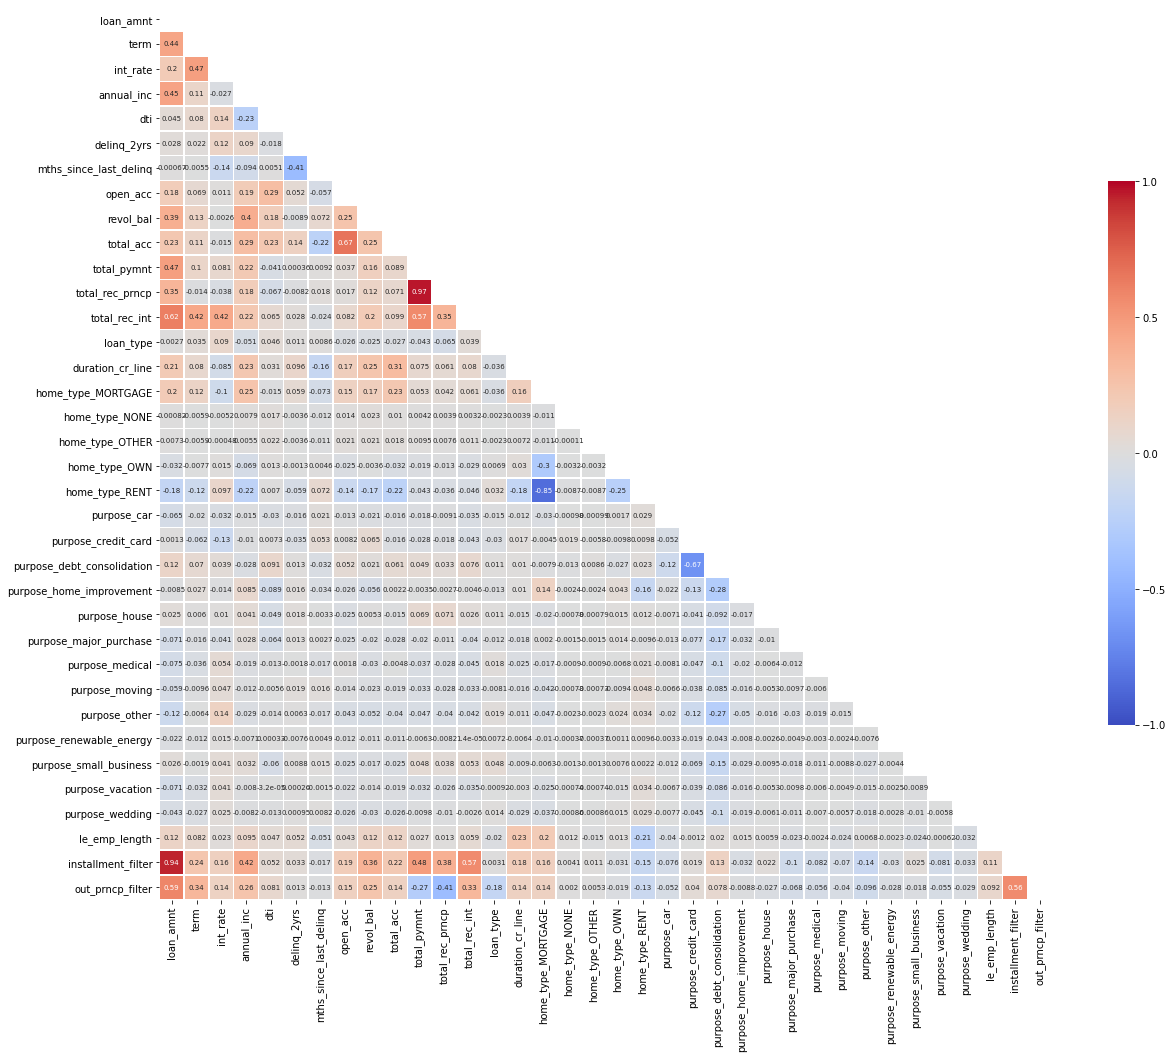

In [330]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(20, 20)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .5, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 7})

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

From the correlation analysis, we can see some relationships :

1.Installment has a direct correlation with the amount of loan

2.Outstanding principal has a direct correlation with the amount of loan

3.Total received principal on the loan has a direct correlation with total payment, installment and total payment on the loan

4.The higher monthly installment, the higher outstanding principal and received interest on the loan.

5.The longer period since the borrower's last delinquency, the less frequency of the borrower's delinquencies in the last 2 years.

6.Duration of the credit line has a direct relationship with the number of the borrower’s total credit accounts, including currently open & closed

7.The borrower who lends the loan for home improvement is likely to be under the mortgage.

8.The borrower with longer employment length is less likely to rent the house.

9.Interest rate has the highest association with the loan type which means that the higher the interest rate, the higher chance that the loan will become a bad loan.


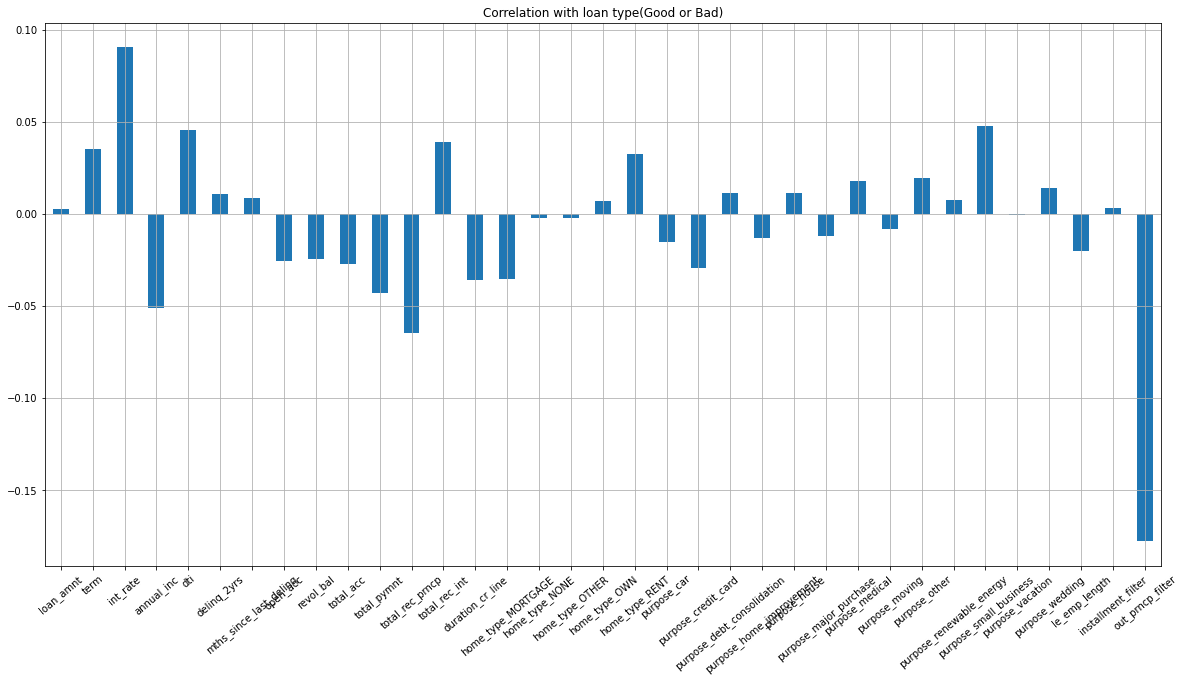

In [331]:
clean_df2 = clean_df.drop(columns=['loan_type'])
clean_df2.corrwith(clean_df.loan_type).plot.bar(figsize = (20, 10), title = "Correlation with loan type(Good or Bad)", fontsize = 10,rot = 40, grid = True)

Text(0.5, 1.0, 'Interest rate Distribution')

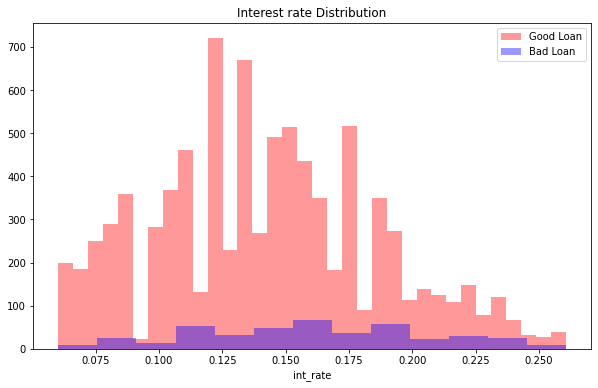

In [466]:
#As interest rate has the highest correlation to the loan type,I want to see whether there is any sighnificant insight

plt.figure(figsize=(10,6))
sns.distplot(clean_df[clean_df["loan_type"] == 0]['int_rate'], color = 'r',label='Good Loan',kde=False)
sns.distplot(clean_df[clean_df["loan_type"] == 1]['int_rate'], color = 'b',label='Bad Loan',kde=False)
plt.legend()
plt.title("Interest rate Distribution")

# Split and standardize the data

Splitting the data to train,test in 80-20.
There is no validation because the model that I'm going to use doesn't require a lot of finetuning.
StandardScaler is used to create standardization in the dataset.

In [345]:
y= clean_df.loan_type
X = clean_df.drop(['loan_type','earliest_cr_line'],axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [371]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)

In [372]:
X_test_scaler = scaler.transform(X_test)

# Method 1 : Random Forest

In [378]:
model1 = RandomForestClassifier(n_estimators=150,random_state=0,bootstrap = True,
                               max_features = 'sqrt')
model1.fit(X_train_scaler, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [384]:
model1.score(X_test_scaler,y_test)

0.9768467475192943

In [385]:
pred1 = model1.predict(X_test_scaler)
f1_score(pred1,y_test)

0.631578947368421

[Text(33.0, 0.5, 'True label'), Text(0.5, 15.0, 'Predicted')]

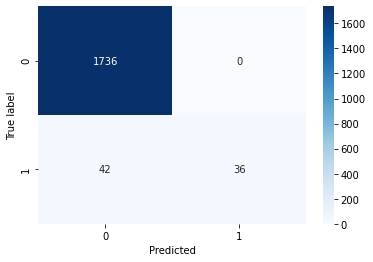

In [456]:
cm = confusion_matrix(y_test,model1.predict(X_test_scaler),)
labels = [cm[0,0],cm[0,1],cm[1,0],cm[1,1]]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='True label')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.48')

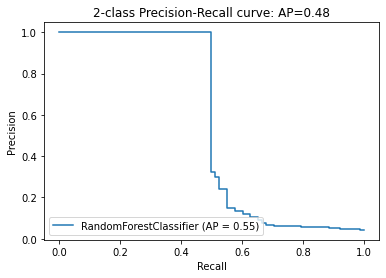

In [405]:
y_score = model1.predict(X_test_scaler)
average_precision = average_precision_score(y_test, y_score)

disp = plot_precision_recall_curve(model1, X_test_scaler, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [406]:
roc_auc_score(y_test, y_score)

0.7307692307692308

## using SMOTE - Synthetic Minority Over-sampling Technique
SMOTE is a popular technique to deal with highly imbalanced dataset. However, after trying this method, the f1_score is lower. Therefore, it might not be a good option for this dataset.

In [394]:
oversample = SMOTE()
X_train_smote,y_train_smote = oversample.fit_resample(X_train_scaler,y_train)
counter = Counter(y_train_smote)
print(counter)

Counter({0: 6905, 1: 6905})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


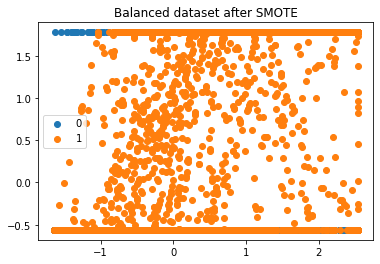

In [395]:
for label, _ in counter.items():
	row_ix = where(y_train_smote == label)[0]
	pyplot.scatter(X_train_smote[row_ix, 0], X_train_smote[row_ix, 1], label=str(label))
pyplot.title('Balanced dataset after SMOTE')
pyplot.legend()
pyplot.show()

In [409]:
model2 = RandomForestClassifier(n_estimators=150,random_state=1,bootstrap = True,
                               max_features = 'sqrt')
model2.fit(X_train_smote,y_train_smote)
pred2 = model2.predict(X_test_scaler)

In [410]:
model2.score(X_test_scaler,y_test)

0.9729878721058435

In [411]:
f1_score(pred2,y_test)

0.5882352941176471

[Text(33.0, 0.5, 'True label'), Text(0.5, 15.0, 'Predicted')]

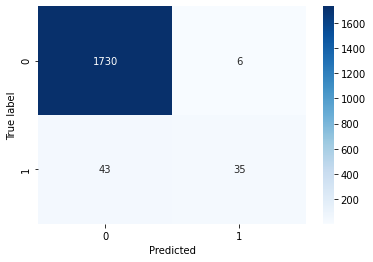

In [412]:
cm = confusion_matrix(y_test,model2.predict(X_test_scaler))
labels = [cm[0,0],cm[0,1],cm[1,0],cm[1,1]]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='True label')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.41')

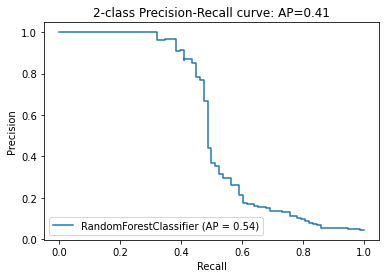

In [437]:
y_score = model2.predict(X_test_scaler)
average_precision = average_precision_score(y_test, y_score)

disp = plot_precision_recall_curve(model2, X_test_scaler, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [414]:
roc_auc_score(y_test, y_score)

0.5226426799007444

## Using RandomUnderSampler

Undersampling is another technique to deal with highly imbalanced dataset. However, the result does not significantly improve as well.

In [428]:
rus = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = rus.fit_resample(X_train_scaler, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [429]:
model3 = RandomForestClassifier(random_state=1)
model3.fit(X_resampled,y_resampled)
pred = model3.predict(X_test_scaler)

In [430]:
model3.score(X_test_scaler,y_test)

0.7976846747519294

In [431]:
f1_score(pred3,y_test)

0.06396588486140725

[Text(33.0, 0.5, 'True label'), Text(0.5, 15.0, 'Predicted')]

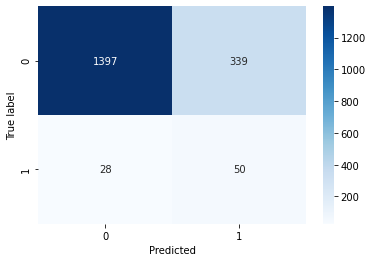

In [432]:
cm = confusion_matrix(y_test,model3.predict(X_test_scaler))
labels = [cm[0,0],cm[0,1],cm[1,0],cm[1,1]]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='True label')

# Method 2: Decision Tree Classifier

As SMOTE and Undersampling don't provide a significant improvement on the f1_score. I won't use them in this model.

In [420]:
decc=DecisionTreeClassifier()
decc.fit(X_train_scaler,y_train.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [434]:
y_pred_decc=decc.predict(X_test_scaler)

In [424]:
decc.score(X_test_scaler,y_test)

0.9437706725468578

In [435]:
f1_score(y_pred_decc,y_test)

0.43956043956043955

[Text(33.0, 0.5, 'True label'), Text(0.5, 15.0, 'Predicted')]

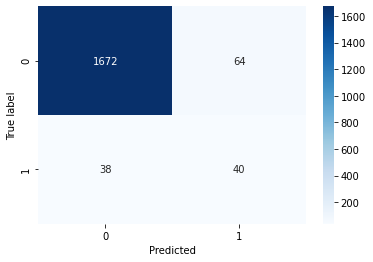

In [436]:
cm = confusion_matrix(y_test,y_pred_decc)
labels = [cm[0,0],cm[0,1],cm[1,0],cm[1,1]]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='True label')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.45')

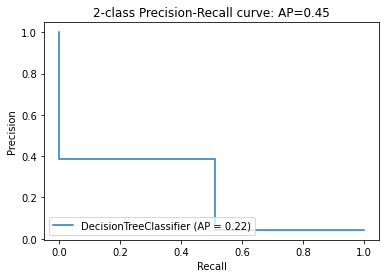

In [453]:
y_score_decc = decc.predict(X_test_scaler)
average_precision = average_precision_score(y_test, y_score)

disp = plot_precision_recall_curve(decc, X_test_scaler, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [454]:
roc_auc_score(y_test, y_score_decc)

0.7379770766867542

# Method 3: Deep Learning Model (Keras)

In [440]:
keras_model = Sequential([
     #First Layer
     Dense(units=16, input_dim=35, activation='relu'),
      #Second Layer
     Dense(units=24,activation='relu'),
     Dropout(0.5),
      #Third Layer
     Dense(20,activation='relu'),
     #Fourth Layer
     Dense(24,activation='relu'),
     #Fifth Layer
     Dense(1,activation='sigmoid')  
      
])
keras_model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                576       
_________________________________________________________________
dense_21 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_23 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 25        
Total params: 2,013
Trainable params: 2,013
Non-trainable params: 0
____________________________________________________

In [441]:
keras_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
keras_model.fit(X_train_scaler,y_train, batch_size=15, epochs=5)

Epoch 1/5
484/484 [==============================] - 1s 1ms/step - loss: 0.2466 - accuracy: 0.9451
Epoch 2/5
484/484 [==============================] - 1s 1ms/step - loss: 0.1883 - accuracy: 0.9518
Epoch 3/5
484/484 [==============================] - 1s 1ms/step - loss: 0.1761 - accuracy: 0.9518
Epoch 4/5
484/484 [==============================] - 1s 1ms/step - loss: 0.1634 - accuracy: 0.9518
Epoch 5/5
484/484 [==============================] - 1s 1ms/step - loss: 0.1533 - accuracy: 0.9522


In [447]:
score=keras_model.evaluate(X_test_scaler,y_test)
print(score)

57/57 [==============================] - 0s 996us/step - loss: 0.1472 - accuracy: 0.9636
[0.14719010889530182, 0.9636163115501404]


In [448]:
y_pred_keras=(keras_model.predict(X_test_scaler).ravel()>0.5).astype(int)

In [449]:
f1_score(y_pred_keras,np.array(y_test))

0.2666666666666667

[Text(33.0, 0.5, 'True label'), Text(0.5, 15.0, 'Predicted')]

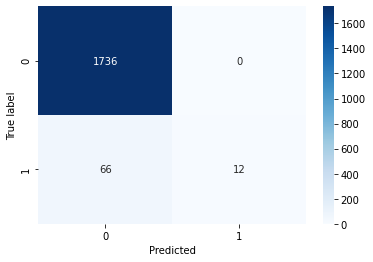

In [451]:
cm = confusion_matrix(y_test,y_pred_keras)
labels = [cm[0,0],cm[0,1],cm[1,0],cm[1,1]]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='True label')

In [457]:
y_score_keras = keras_model.predict(X_test_scaler)

0.7971980976013234